# Question 14

Write a program to calculate `∆x` and `∆y` for each pixel of an input image _`f(x,y)`_ using Prewitt’s operator (gradient operator).

```
-1  0  1    -1 -1 -1
-1  0  1     0  0  0
-1  0  1     1  1  1
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'fu256',
    'l256',
    'n256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image,
        'equalized': None
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



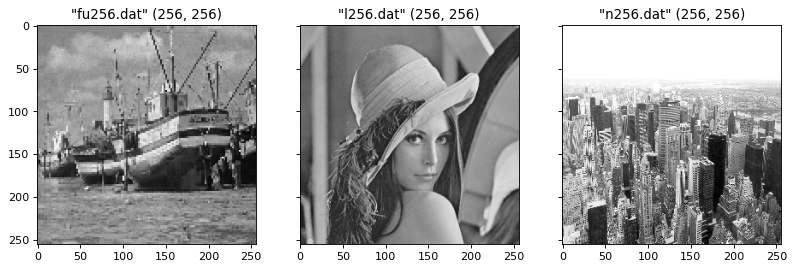

In [4]:
# Matrix dimensions
cols = 3
rows = 1

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[idx].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[idx].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Sharpen Images

In [5]:
def sharpen_image(image):
    k_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype='float32')
    k_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype='float32')

    height, width = image.shape
    tmp = np.zeros((height + 2, width + 2))
    img = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            tmp[i + 1][j + 1] = image[i][j]

    for i in range(height):
        for j in range(width):
            s_x = 0
            for m in [-1, 0, 1]:
                for n in [-1, 0, 1]:
                    s_x += tmp[i + m][j + n] * k_x[m + 1][n + 1]
            s_x = abs(s_x // 9)

            s_y = 0
            for m in [-1, 0, 1]:
                for n in [-1, 0, 1]:
                    s_y += tmp[i + m][j + n] * k_y[m + 1][n + 1]
            s_y = abs(s_y // 9)

            img[i][j] = s_x + s_y
    img.astype('uint8')
    return img

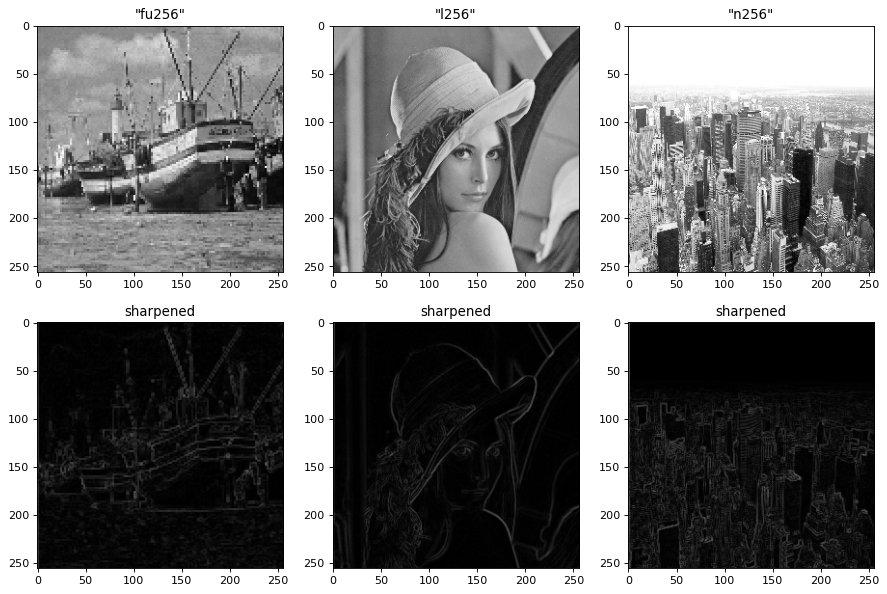

In [6]:
rows, cols = 2, len(images)

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']

    orig = image_dict['orig']
    sharp = sharpen_image(orig)

    axs[0, idx].set_title('"{}"'.format(filename))
    axs[0, idx].imshow(orig, cmap='gray', vmin=0, vmax=255)

    axs[1, idx].set_title('sharpened'.format(filename))
    axs[1, idx].imshow(sharp, cmap='gray', vmin=0, vmax=255)

    # Save pixel values of original image's histogram as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + f'_sharpened' + ext_inp,
        sharp,
        fmt=' %d',
        newline=' \n'
    )

    # Save noisy image as .bmp file
    plt.imsave(
        path_out_conv + ext_out[1:] + '/' + filename + f'_sharpened' + ext_out,
        sharp,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Save and display the figure
plt.savefig('sharpened_image.jpg')
plt.show()